In [2]:
import pandas as pd

data = {
    'usia': [25, 35, 45, 50, 23, 40, 60, 30, 50, 65, 55, 43],
    'tekanan_darah': [120, 130, 140, 150, 115, 135, 160, 125, 145, 170, 155, 138],
    'jk': ['pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'pria', 'pria', 'wanita', 'wanita', 'pria', 'wanita'],
    'risiko': ['rendah', 'rendah', 'tinggi', 'tinggi', 'rendah', 'tinggi', 'tinggi', 'rendah', 'tinggi', 'tinggi', 'tinggi', 'tinggi']
}

# Membuat DataFrame
df = pd.DataFrame(data)
print(df)

    usia  tekanan_darah      jk  risiko
0     25            120    pria  rendah
1     35            130    pria  rendah
2     45            140    pria  tinggi
3     50            150  wanita  tinggi
4     23            115  wanita  rendah
5     40            135  wanita  tinggi
6     60            160    pria  tinggi
7     30            125    pria  rendah
8     50            145  wanita  tinggi
9     65            170  wanita  tinggi
10    55            155    pria  tinggi
11    43            138  wanita  tinggi


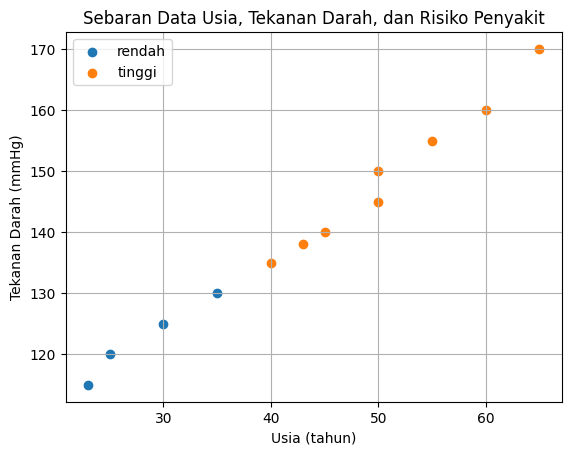

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for risiko, d in df.groupby('risiko'):
    ax.scatter(d['usia'], d['tekanan_darah'], label=risiko)

plt.legend(loc='upper left')
plt.title('Sebaran Data Usia, Tekanan Darah, dan Risiko Penyakit')
plt.xlabel('Usia (tahun)')
plt.ylabel('Tekanan Darah (mmHg)')
plt.grid(True)
plt.show()

In [4]:
import numpy as np

X_train = np.array(df[['usia', 'tekanan_darah']])
y_train = np.array(df['risiko'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[ 25 120]
 [ 35 130]
 [ 45 140]
 [ 50 150]
 [ 23 115]
 [ 40 135]
 [ 60 160]
 [ 30 125]
 [ 50 145]
 [ 65 170]
 [ 55 155]
 [ 43 138]]

y_train: ['rendah' 'rendah' 'tinggi' 'tinggi' 'rendah' 'tinggi' 'tinggi' 'rendah'
 'tinggi' 'tinggi' 'tinggi' 'tinggi']


In [5]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [6]:
y_train = y_train.flatten()

In [7]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
usia_baru = 38
tekanan_darah_baru = 148
X_new = np.array([usia_baru, tekanan_darah_baru]).reshape(1, -1)
X_new

array([[ 38, 148]])

In [9]:
y_new = model.predict(X_new)

In [10]:
risiko_baru = lb.inverse_transform(y_new)
print(f'Prediksi risiko penyakit untuk usia {usia_baru} tahun dan tekanan darah {tekanan_darah_baru} mmHg: {risiko_baru[0]}')

Prediksi risiko penyakit untuk usia 38 tahun dan tekanan darah 148 mmHg: tinggi


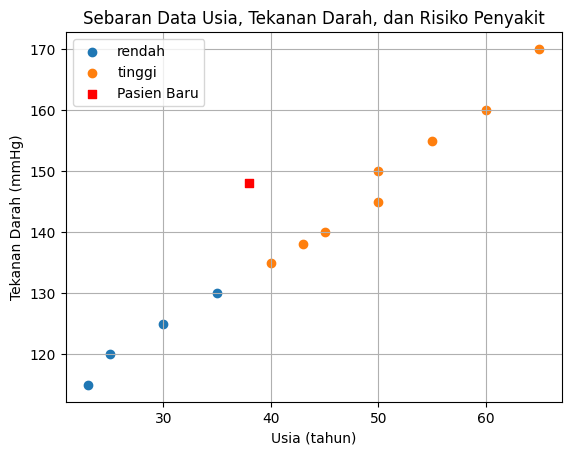

In [11]:
fig, ax = plt.subplots()
for risiko, d in df.groupby('risiko'):
    ax.scatter(d['usia'], d['tekanan_darah'], label=risiko)

plt.scatter(usia_baru,
            tekanan_darah_baru,
            marker='s',
            color='red',
            label='Pasien Baru')

plt.legend(loc='upper left')
plt.title('Sebaran Data Usia, Tekanan Darah, dan Risiko Penyakit')
plt.xlabel('Usia (tahun)')
plt.ylabel('Tekanan Darah (mmHg)')
plt.grid(True)
plt.show()

In [12]:
pasien_baru = np.array([usia_baru, tekanan_darah_baru])
pasien_baru

array([ 38, 148])

In [13]:
X_train

array([[ 25, 120],
       [ 35, 130],
       [ 45, 140],
       [ 50, 150],
       [ 23, 115],
       [ 40, 135],
       [ 60, 160],
       [ 30, 125],
       [ 50, 145],
       [ 65, 170],
       [ 55, 155],
       [ 43, 138]], dtype=int64)

In [14]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(pasien_baru, d) for d in X_train]
data_jarak

[30.870698080866262,
 18.24828759089466,
 10.63014581273465,
 12.165525060596439,
 36.24913792078372,
 13.152946437965905,
 25.059928172283335,
 24.351591323771842,
 12.36931687685298,
 34.828149534535996,
 18.384776310850235,
 11.180339887498949]

In [15]:
df['jarak'] = data_jarak
df.sort_values(['jarak'])

,usia,tekanan_darah,jk,risiko,jarak
2,45,140,pria,tinggi,10.630146
11,43,138,wanita,tinggi,11.180340
3,50,150,wanita,tinggi,12.165525
8,50,145,wanita,tinggi,12.369317
5,40,135,wanita,tinggi,13.152946
1,35,130,pria,rendah,18.248288
10,55,155,pria,tinggi,18.384776
7,30,125,pria,rendah,24.351591
6,60,160,pria,tinggi,25.059928
0,25,120,pria,rendah,30.870698


Evaluasi KNN Classification Model

Testing set

In [17]:
X_test = np.array([[178, 70], [176, 65], [163, 56], [157, 49]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[178  70]
 [176  65]
 [163  56]
 [157  49]]

y_test:
[0 0 0 0]


Prediksi terhadap testing set

In [18]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1])

Accuracy

In [19]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.0


Precission

In [20]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.0


Recall

In [21]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 0.0


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score

In [22]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.0


Classification Report

In [23]:
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       4.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

Matthews Correlation Coefficient (MCC)

In [24]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0
